<a href="https://colab.research.google.com/github/ArpitaChatterjee/B2B-date-prediction-model/blob/main/H2HBABBA2810_Jack_Arpita_Chatterjee_Milestone3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



In [2]:
df= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/HIghRadius/H2HBABBA2810.csv")
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200078795,H T H co,2020-03-05 00:00:00,2020.0,1.930544e+09,2020-02-19,20200219,20200219,20200305.0,USD,RV,1.0,NaN,1609.27,20200219.0,NAA8,1.930544e+09,0
1,U001,200726979,BJ'S foundation,2020-01-21 00:00:00,2020.0,1.930344e+09,2020-01-03,20200102,20200103,20200118.0,USD,RV,1.0,NaN,98529.29,20200103.0,NAA8,1.930344e+09,0
2,U001,0200794332,COST trust,NaN,2020.0,1.930845e+09,2020-05-01,20200501,20200501,20200516.0,USD,RV,1.0,NaN,13776.49,20200501.0,NAAX,1.930845e+09,1
3,U001,0200744019,TARG co,NaN,2020.0,1.930702e+09,2020-03-26,20200325,20200326,20200410.0,USD,RV,1.0,NaN,55901.16,20200326.0,NAA8,1.930702e+09,1
4,U001,0200769623,WAL-MAR corp,NaN,2020.0,1.930831e+09,2020-04-28,20200428,20200428,20200513.0,USD,RV,1.0,NaN,61618.82,20200428.0,NAH4,1.930831e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200769623,WAL-MAR llc,2019-11-12 00:00:00,2019.0,1.930056e+09,2019-10-29,20191026,20191029,20191113.0,USD,RV,1.0,NaN,15887.43,20191029.0,NAH4,1.930056e+09,0
49996,U001,0200696090,UNITE corp,NaN,2020.0,1.930844e+09,2020-05-05,20200504,20200505,20200520.0,USD,RV,1.0,NaN,3885.92,20200505.0,NAA8,1.930844e+09,1
49997,CA02,0140106165,OCEA llc,NaN,2020.0,2.960629e+09,2020-04-17,20200417,20200417,20200502.0,CAD,RV,1.0,NaN,1940.40,20200422.0,CA10,2.960629e+09,1
49998,U001,200769623,WAL-MAR corporation,NaN,2020.0,1.930886e+09,2020-05-12,20200511,20200512,20200527.0,USD,RV,1.0,NaN,13807.07,20200512.0,NAH4,1.930886e+09,1


#About the data

In [3]:
df.shape

(50000, 19)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           50000 non-null  float64
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  float64
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

#Data Preprocessing

In [5]:
df.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    5
isOpen                        0
dtype: int64

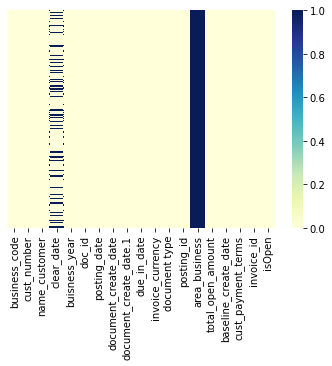

In [6]:
sns.heatmap(df.isnull(), yticklabels=False, cmap="YlGnBu")

In [7]:
df.dropna(how='all', axis=1, inplace=True) #drop the col with highest NULL values

In [8]:
df['invoice_id']=df[df['invoice_id'].isnull()==False]

-->Since document_create_data & document_create_data.1  && 
docid and invoice_id have  &&  
 baseline and due_date are correlated by >98%, hence drop one col. 

-->since posting_id has almmost null values, so i'll drop it.

In [9]:
df.nunique()

business_code                 6
cust_number                1429
name_customer              4186
clear_date                  398
buisness_year                 2
doc_id                    48793
posting_date                504
document_create_date        507
document_create_date.1      504
due_in_date                 551
invoice_currency              2
document type                 2
posting_id                    1
total_open_amount         44089
baseline_create_date        508
cust_payment_terms           71
invoice_id                    6
isOpen                        2
dtype: int64

In [10]:
df.drop(columns=['doc_id', 'document type'], inplace=True, axis=1)

In [11]:
df.drop_duplicates(keep='first', inplace=True)
df.shape

(48780, 16)

In [12]:
df.T.drop_duplicates(keep='first', inplace=True)

In [13]:
df.drop(columns=['document_create_date.1'], inplace=True, axis=1)
df.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'posting_date', 'document_create_date', 'due_in_date',
       'invoice_currency', 'posting_id', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'isOpen'],
      dtype='object')

In [14]:
df['invoice_currency'].value_counts()

USD    45007
CAD     3773
Name: invoice_currency, dtype: int64

In [15]:
def convertcurr(row):
	if row["invoice_currency"] == 'CAD':
		return row['total_open_amount'] * (0.8) 
	else:
		return row['total_open_amount']

df["total_open_amt(USD)"] = df.apply(convertcurr, axis=1)

pd.options.display.float_format = '{:.2f}'.format

df.drop(columns=['invoice_currency', 'total_open_amount'], inplace=True,axis=1)
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,due_in_date,posting_id,baseline_create_date,cust_payment_terms,invoice_id,isOpen,total_open_amt(USD)
0,U001,0200078795,H T H co,2020-03-05 00:00:00,2020.00,2020-02-19,20200219,20200305.00,1.00,20200219.00,NAA8,U001,0,1609.27
1,U001,200726979,BJ'S foundation,2020-01-21 00:00:00,2020.00,2020-01-03,20200102,20200118.00,1.00,20200103.00,NAA8,U001,0,98529.29
2,U001,0200794332,COST trust,NaN,2020.00,2020-05-01,20200501,20200516.00,1.00,20200501.00,NAAX,U001,1,13776.49
3,U001,0200744019,TARG co,NaN,2020.00,2020-03-26,20200325,20200410.00,1.00,20200326.00,NAA8,U001,1,55901.16
4,U001,0200769623,WAL-MAR corp,NaN,2020.00,2020-04-28,20200428,20200513.00,1.00,20200428.00,NAH4,U001,1,61618.82


In [16]:
ax=[x for x in df['cust_payment_terms'].value_counts().sort_values(ascending=False).head(14).index]
df['cust_payment_terms'] = np.where(df['cust_payment_terms'].isin(ax),df['cust_payment_terms'], "Other")

In [17]:
df['cust_payment_terms'].value_counts()

NAA8     19413
NAH4     13456
CA10      3686
Other     2212
NAC6      1757
NAM4      1332
NAAX      1197
NAU5       899
NAD1       861
NAGD       843
NAG2       831
NA32       735
NAX2       571
NAM2       556
NA10       431
Name: cust_payment_terms, dtype: int64

In [18]:
df.name_customer.value_counts().head(40)

WAL-MAR corporation    1191
WAL-MAR in             1149
WAL-MAR co             1122
WAL-MAR systems        1122
WAL-MAR foundation     1111
WAL-MAR us             1104
WAL-MAR                1101
WAL-MAR associates     1089
WAL-MAR corp           1086
WAL-MAR trust          1086
WAL-MAR llc            1050
BJ'S  us                203
BJ'S  associates        190
BJ'S                    189
BJ'S  trust             182
C&S WH llc              177
BJ'S  systems           175
BJ'S  llc               174
C&S WH corporation      173
BJ'S  in                171
BJ'S  foundation        171
BJ'S  corporation       170
BJ'S  corp              170
BJ'S  co                170
C&S WH systems          167
C&S WH corp             165
SA foundation           165
SA llc                  160
SA in                   159
SA trust                156
SA corp                 155
SA us                   152
SA corporation          152
C&S WH in               148
SA co                   147
SA                  

In [19]:
bx=[x for x in df['name_customer'].value_counts().sort_values(ascending=False).head(830).index]
df['name_customer'] = np.where(df['name_customer'].isin(bx),df['name_customer'], "Other")

In [20]:
df['name_customer'].value_counts().unique()

array([7312, 1191, 1149, 1122, 1111, 1104, 1101, 1089, 1086, 1050,  203,
        190,  189,  182,  177,  175,  174,  173,  171,  170,  167,  165,
        160,  159,  156,  155,  152,  148,  147,  145,  142,  141,  137,
        136,  134,  131,  128,  125,  122,  121,  118,  114,  113,  112,
        111,  109,  108,  107,  104,  103,  102,  101,  100,   99,   98,
         97,   96,   93,   92,   89,   88,   87,   86,   85,   83,   82,
         81,   80,   79,   78,   77,   76,   75,   74,   73,   72,   71,
         70,   68,   66,   65,   64,   63,   62,   61,   60,   59,   58,
         57,   56,   55,   54,   53,   52,   51,   50,   49,   48,   47,
         46,   45,   44,   43,   42,   41,   40,   39,   38,   37,   36,
         35,   34,   33,   32,   31,   30,   29,   28,   27,   26,   25,
         24,   23,   22,   21,   20,   19,   18,   17,   16,   15,   14,
         13,   12,   11,   10,    9])

In [21]:
df.cust_number.value_counts()

0200769623    11439
0200726979     1856
0200762301     1542
0200759878     1333
0200794332     1120
              ...  
0200865160        1
0200541916        1
0100053798        1
0200366118        1
140106322         1
Name: cust_number, Length: 1429, dtype: int64

In [22]:
cx=[x for x in df['cust_number'].value_counts().sort_values(ascending=False).head(285).index]
df['cust_number'] = np.where(df['cust_number'].isin(cx),df['cust_number'], "Other")

In [23]:
df.cust_number.value_counts()

0200769623    11439
Other          3730
0200726979     1856
0200762301     1542
0200759878     1333
              ...  
200803720        14
0200609331       14
0200719839       14
0200668077       14
0140103400       14
Name: cust_number, Length: 286, dtype: int64

predic delay=> taget=cleardate-duedate

In [24]:
df['clear_date']=pd.to_datetime(df['clear_date'])
df['clear_date']

0       2020-03-05
1       2020-01-21
2              NaT
3              NaT
4              NaT
           ...    
49995   2019-11-12
49996          NaT
49997          NaT
49998          NaT
49999          NaT
Name: clear_date, Length: 48780, dtype: datetime64[ns]

In [25]:
df['due_in_date']=(df['due_in_date']).astype(int)
df['due_in_date']

0        20200305
1        20200118
2        20200516
3        20200410
4        20200513
           ...   
49995    20191113
49996    20200520
49997    20200502
49998    20200527
49999    20200429
Name: due_in_date, Length: 48780, dtype: int64

In [26]:
df['due_in_date']=pd.to_datetime(df['due_in_date'], format='%Y%M%d')
df['due_in_date']

0       2020-01-05 00:03:00
1       2020-01-18 00:01:00
2       2020-01-16 00:05:00
3       2020-01-10 00:04:00
4       2020-01-13 00:05:00
                ...        
49995   2019-01-13 00:11:00
49996   2020-01-20 00:05:00
49997   2020-01-02 00:05:00
49998   2020-01-27 00:05:00
49999   2020-01-29 00:04:00
Name: due_in_date, Length: 48780, dtype: datetime64[ns]

In [27]:
df['delay']=(df['clear_date'].dt.date-df['due_in_date'].dt.date)
df['delay']

0        60 days
1         3 days
2            NaT
3            NaT
4            NaT
          ...   
49995   303 days
49996        NaT
49997        NaT
49998        NaT
49999        NaT
Name: delay, Length: 48780, dtype: timedelta64[ns]

In [28]:
df.sort_values(by=['posting_date'], inplace=True, ascending=True)

In [29]:
df

,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,due_in_date,posting_id,baseline_create_date,cust_payment_terms,invoice_id,isOpen,total_open_amt(USD),delay
22792,U001,0200719300,Other,2019-01-15,2019.00,2018-12-30,20181231,2019-01-14 00:01:00,1.00,20181230.00,NAA8,U001,0,768.00,1 days
36097,U001,0200726979,BJ'S corporation,2019-01-15,2019.00,2018-12-30,20181229,2019-01-14 00:01:00,1.00,20181230.00,NAA8,U001,0,89.75,1 days
36666,U001,0200769623,WAL-MAR us,2019-01-15,2019.00,2018-12-30,20181229,2019-01-14 00:01:00,1.00,20181230.00,NAH4,U001,0,12709.16,1 days
46719,U001,0200726979,BJ'S systems,2019-01-15,2019.00,2018-12-30,20181229,2019-01-14 00:01:00,1.00,20181230.00,NAA8,U001,0,64.74,1 days
37354,U001,0200759878,SA foundation,2019-01-17,2019.00,2018-12-30,20181230,2019-01-14 00:01:00,1.00,20181230.00,NAH4,U001,0,26193.03,3 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38299,CA02,0140104429,COSTCO co,NaT,2020.00,2020-05-13,20200513,2020-01-23 00:05:00,1.00,20200513.00,CA10,CA02,1,34064.49,NaT
10215,U001,Other,Other,NaT,2020.00,2020-05-15,20200514,2020-01-30 00:05:00,1.00,20200515.00,NAA8,U001,1,15902.25,NaT
14402,U001,Other,Other,NaT,2020.00,2020-05-16,20200513,2020-01-31 00:05:00,1.00,20200516.00,NAA8,U001,1,17893.25,NaT
8545,U013,Other,Other,NaT,2020.00,2020-05-20,20200520,2020-01-19 00:06:00,1.00,20200520.00,Other,U013,1,60726.46,NaT


#Split Test and Train Data

In [338]:
### Splitting the Data into TEST_SET and TRAINING_SET
test = df[df['clear_date'].isnull()]
train = df[df['clear_date'].notnull()]


### Data Now Looks Like:
df.shape, test.shape, train.shape

#Train-Test Split on the Train Data

In [245]:
from sklearn.model_selection import train_test_split

In [246]:
#split depending and target variable using iloc
x=train.iloc[:, :-1]
y=train.iloc[:, -1:]

In [247]:
x.shape, y.shape

((39106, 14), (39106, 1))

In [248]:
# Split dataset to training and test set
#train=70%, test=30%
x_train,x_test_ini, y_train, y_test_ini= train_test_split(x,y, test_size = 0.3, random_state = 0, shuffle=False)

In [249]:
x_train.shape, x_test_ini.shape
#len(x_val)

((27374, 14), (11732, 14))

In [250]:
#val=50%, test=50%
x_test, x_val, y_test, y_val= train_test_split(x_test_ini, y_test_ini, test_size=0.5, random_state=0, shuffle=False)

In [251]:
x_test.shape, x_val.shape, y_test.shape, y_val.shape

((5866, 14), (5866, 14), (5866, 1), (5866, 1))

#Feature Engineering

1. Label Encoding -- on the object dtype set(cust_name, cust_num, )
2. Datetime-> int convert
3. Use Feature Scaling--> Gausian Transformation--> BoxCox / Exponential
4. Outliers--> 'Date', 'Delay', 'Amt'--store in a variable the values--> calc by z-score(better, easy way)--to visualize use boxplot

Whatever u do apply same featues in the test + val set

In [252]:
x_train.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'posting_date', 'document_create_date', 'due_in_date',
       'posting_id', 'baseline_create_date', 'cust_payment_terms',
       'invoice_id', 'isOpen', 'total_open_amt(USD)'],
      dtype='object')

In [253]:
x_train.nunique()

business_code               6
cust_number               286
name_customer             831
clear_date                285
buisness_year               1
posting_date              283
document_create_date      289
due_in_date               344
posting_id                  1
baseline_create_date      295
cust_payment_terms         15
invoice_id                  6
isOpen                      1
total_open_amt(USD)     25079
dtype: int64

In [254]:
# fn to drop col with 1/2 unique col(here, they dont hold much value otherwise do label encoding, or bucketize 'em)
def drop_trash(df):
  for col in df.columns:
    if df[col].nunique()<=2:
        df.drop( col, axis=1, inplace=True)

drop_trash(x_train)
drop_trash(x_val)
drop_trash(x_test)

In [255]:
x_train.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'posting_date', 'document_create_date', 'due_in_date',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id',
       'total_open_amt(USD)'],
      dtype='object')

In [256]:
#the 4 binary varibles
def one_hot_encode(df, fea):
  #list of category with most frequent categories of the variable
  top_4_bc=[x for x in df[fea].value_counts().sort_values(ascending=False).head(4).index]
  for label in top_4_bc:
    df[label]=np.where(df[fea]==label, 1, 0)
  #zip(df[fea],top_4_bc)
  df.drop(fea, axis=1, inplace=True)

In [257]:
#one_hot_encode(x_train,'business_code')
#x_train

#apply on the test sets
#one_hot_encode(x_test, 'business_code')
#one_hot_encode(x_val, 'business_code')

In [258]:
x_train.dtypes

business_code                   object
cust_number                     object
name_customer                   object
clear_date              datetime64[ns]
posting_date                    object
document_create_date             int64
due_in_date             datetime64[ns]
baseline_create_date           float64
cust_payment_terms              object
invoice_id                      object
total_open_amt(USD)            float64
dtype: object

In [259]:
#function to convert posting date to month
def converposting_date(df, fea):
  df[fea]=pd.to_datetime(df[fea])
  df['posting_mth']=df[fea].dt.month
  df['posting_day']=df[fea].dt.day

converposting_date(x_train, 'posting_date')
converposting_date(x_val, 'posting_date')
converposting_date(x_test, 'posting_date')

#function to convert clear date to month
def converposting_date(df, fea):
  df[fea]=pd.to_datetime(df[fea])
  df['clear_mth']=df[fea].dt.month
  df['clear_day']=df[fea].dt.day

converposting_date(x_train, 'clear_date')
converposting_date(x_val, 'clear_date')
converposting_date(x_test, 'clear_date')

#function to convert due date to month
def converposting_date(df, fea):
  df[fea]=pd.to_datetime(df[fea])
  df['due_mth']=df[fea].dt.month
  df['due_day']=df[fea].dt.day

converposting_date(x_train, 'due_in_date')
converposting_date(x_val, 'due_in_date')
converposting_date(x_test, 'due_in_date')

In [260]:
x_train.dtypes

business_code                   object
cust_number                     object
name_customer                   object
clear_date              datetime64[ns]
posting_date            datetime64[ns]
document_create_date             int64
due_in_date             datetime64[ns]
baseline_create_date           float64
cust_payment_terms              object
invoice_id                      object
total_open_amt(USD)            float64
posting_mth                      int64
posting_day                      int64
clear_mth                        int64
clear_day                        int64
due_mth                          int64
due_day                          int64
dtype: object

In [261]:
x_train['clear_date'].dt.year.value_counts()

2019    27374
Name: clear_date, dtype: int64

In [262]:
#store the dates for later use if needed
clear_post_due_dates=x_train.drop(columns=['clear_date', 'posting_date', 'due_in_date'], axis=1, inplace=True)
clear_post_due_dates=x_test.drop(columns=['clear_date', 'posting_date', 'due_in_date'], axis=1, inplace=True)
clear_post_due_dates=x_val.drop(columns=['clear_date', 'posting_date', 'due_in_date'], axis=1, inplace=True)

In [263]:
!pip install  category_encoders

In [264]:
#Ordinal Encoding by using .cat.codes
#from sklearn.preprocessing import OrdinalEncoder
#encoder = OrdinalEncoder(handle_unknown= 'use_encoded_value', unknown_value='-1)
#x_train[['name_cust_enc','cust_no_enc', 'business_code_enc','cust_payment_terms_enc']] = encoder.fit_transform(x_train[['name_customer', 'cust_number', 'business_code','cust_payment_terms']])

x_train['name_customer_enc'] = x_train['name_customer'].astype('category').cat.codes
x_train['cust_number_enc'] = x_train['cust_number'].astype('category').cat.codes
x_train['business_code_enc'] = x_train['business_code'].astype('category').cat.codes
x_train['cust_payment_terms_enc'] = x_train['cust_payment_terms'].astype('category').cat.codes

x_train[['name_customer', 'cust_number', 'business_code','cust_payment_terms','name_customer_enc','cust_number_enc', 'business_code_enc','cust_payment_terms_enc']]

,name_customer,cust_number,business_code,cust_payment_terms,name_customer_enc,cust_number_enc,business_code_enc,cust_payment_terms_enc
22792,Other,0200719300,U001,NAA8,508,122,1,3
36097,BJ'S corporation,0200726979,U001,NAA8,72,133,1,3
36666,WAL-MAR us,0200769623,U001,NAH4,800,178,1,9
46719,BJ'S systems,0200726979,U001,NAA8,76,133,1,3
37354,SA foundation,0200759878,U001,NAH4,583,164,1,9
...,...,...,...,...,...,...,...,...
36173,Other,Other,U001,NAD1,508,285,1,6
40084,C&S WH llc,0200762301,U001,Other,112,167,1,14
29796,KROGER associates,0200752302,U001,NAA8,395,157,1,3
45781,Other,0100036538,U001,NAA8,508,15,1,3


In [265]:
#to handle unkonwn values in OrdinalEncoding
#test
x_test['name_customer_enc'] = x_test['name_customer'].astype('category').cat.codes
x_test['cust_number_enc'] = x_test['cust_number'].astype('category').cat.codes
x_test['business_code_enc'] = x_test['business_code'].astype('category').cat.codes
x_test['cust_payment_terms_enc'] = x_test['cust_payment_terms'].astype('category').cat.codes
#val
x_val['name_customer_enc'] = x_val['name_customer'].astype('category').cat.codes
x_val['cust_number_enc'] = x_val['cust_number'].astype('category').cat.codes
x_val['business_code_enc'] = x_val['business_code'].astype('category').cat.codes
x_val['cust_payment_terms_enc'] = x_val['cust_payment_terms'].astype('category').cat.codes

In [266]:
#x_val[['name_cust_enc','cust_no_enc', 'business_code_enc','cust_payment_terms_enc']] = encoder.transform(x_val[['name_customer', 'cust_number', 'business_code','cust_payment_terms']])
#x_test[['name_cust_enc','cust_no_enc', 'business_code_enc']] = encoder.transform(x_test[['name_customer', 'cust_number', 'business_code']])

x_test[['name_customer', 'cust_number', 'business_code','cust_payment_terms','name_customer_enc','cust_number_enc', 'business_code_enc','cust_payment_terms_enc']]

,name_customer,cust_number,business_code,cust_payment_terms,name_customer_enc,cust_number_enc,business_code_enc,cust_payment_terms_enc
39971,Other,0200752393,U001,NAA8,436,151,1,3
22690,SYSCO,0200785971,U001,NAA8,598,197,1,3
38907,SYSCO corp,0200900909,U001,NA32,626,227,1,2
43605,AM corp,0200418007,U001,Other,28,74,1,14
17628,Other,0140104392,CA02,CA10,436,28,0,0
...,...,...,...,...,...,...,...,...
21586,WAL-MAR foundation,0200769623,U001,NAH4,699,171,1,9
2003,WAL-MAR foundation,0200769623,U001,NAH4,699,171,1,9
22793,SA systems,0200759878,U001,NAH4,509,157,1,9
23893,SA us,0200759878,U001,NAH4,511,157,1,9


In [267]:
name_no_code_pterms=x_train.drop(columns=['name_customer', 'cust_number', 'business_code','cust_payment_terms'], axis=1, inplace=True)
name_no_code__pterms_VAl=x_val.drop(columns=['name_customer', 'cust_number', 'business_code','cust_payment_terms'], axis=1, inplace=True)
name_no_code_pterms_TEST=x_test.drop(columns=['name_customer', 'cust_number', 'business_code','cust_payment_terms'], axis=1, inplace=True)

In [268]:
x_train.dtypes

document_create_date        int64
baseline_create_date      float64
invoice_id                 object
total_open_amt(USD)       float64
posting_mth                 int64
posting_day                 int64
clear_mth                   int64
clear_day                   int64
due_mth                     int64
due_day                     int64
name_customer_enc           int16
cust_number_enc             int16
business_code_enc            int8
cust_payment_terms_enc       int8
dtype: object

In [269]:
def flt_to_int(df):
  #df['doc_id_enc']= df['doc_id'].astype(int)
  df['baseline_create_date']= df['baseline_create_date'].astype(int)
  #df['invoice_id']= df['invoice_id_enc'].astype(int)
  df['total_open_amt(USD)']= df['total_open_amt(USD)'].astype(int)

In [270]:
#flt_to_int(x_train)
#flt_to_int(x_test)
#flt_to_int(x_val)

In [271]:
x_train.drop('invoice_id', axis=1, inplace=True)
x_val.drop('invoice_id', axis=1, inplace=True)
x_test.drop('invoice_id', axis=1, inplace=True)


In [272]:
x_train.dtypes

document_create_date        int64
baseline_create_date      float64
total_open_amt(USD)       float64
posting_mth                 int64
posting_day                 int64
clear_mth                   int64
clear_day                   int64
due_mth                     int64
due_day                     int64
name_customer_enc           int16
cust_number_enc             int16
business_code_enc            int8
cust_payment_terms_enc       int8
dtype: object

In [273]:
x_train.columns

Index(['document_create_date', 'baseline_create_date', 'total_open_amt(USD)',
       'posting_mth', 'posting_day', 'clear_mth', 'clear_day', 'due_mth',
       'due_day', 'name_customer_enc', 'cust_number_enc', 'business_code_enc',
       'cust_payment_terms_enc'],
      dtype='object')

In [274]:
y_train['delay']=pd.to_timedelta(y_train['delay']).dt.days
y_train['delay']

22792      1
36097      1
36666      1
46719      1
37354      3
        ... 
36173    275
40084    279
29796    273
45781    265
7364     268
Name: delay, Length: 27374, dtype: int64

In [275]:
y_test['delay']=pd.to_timedelta(y_test['delay']).dt.days
y_val['delay']=pd.to_timedelta(y_val['delay']).dt.days

#Feature Scaling 

In [276]:
from sklearn import preprocessing
from sklearn import utils
from sklearn.preprocessing import MinMaxScaler

In [277]:
minmax=MinMaxScaler()
x_train=pd.DataFrame(minmax.fit_transform(x_train),columns=x_train.columns)
x_train.head()

,document_create_date,baseline_create_date,total_open_amt(USD),posting_mth,posting_day,clear_mth,clear_day,due_mth,due_day,name_customer_enc,cust_number_enc,business_code_enc,cust_payment_terms_enc
0,0.00,0.09,0.00,1.00,0.97,0.00,0.47,0.00,0.43,0.61,0.43,0.20,0.21
1,0.00,0.09,0.00,1.00,0.97,0.00,0.47,0.00,0.43,0.09,0.47,0.20,0.21
2,0.00,0.09,0.01,1.00,0.97,0.00,0.47,0.00,0.43,0.96,0.62,0.20,0.64
3,0.00,0.09,0.00,1.00,0.97,0.00,0.47,0.00,0.43,0.09,0.47,0.20,0.21
4,0.00,0.09,0.02,1.00,0.97,0.00,0.53,0.00,0.43,0.70,0.58,0.20,0.64


In [278]:
x_val=pd.DataFrame(minmax.transform(x_val), columns=x_val.columns)
x_test=pd.DataFrame(minmax.transform(x_test), columns=x_test.columns)

In [279]:
print(utils.multiclass.type_of_target(x_train))
print(utils.multiclass.type_of_target(x_train.astype('int')))
#print(utils.multiclass.type_of_target(encoded))

continuous-multioutput
multilabel-indicator


#EDA

In [280]:
import scipy.stats as stat
import pylab

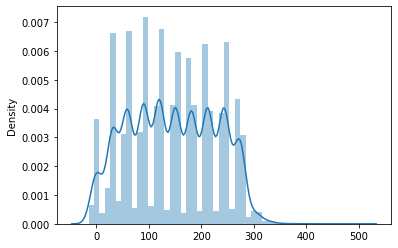

In [281]:
sns.distplot(y_train)

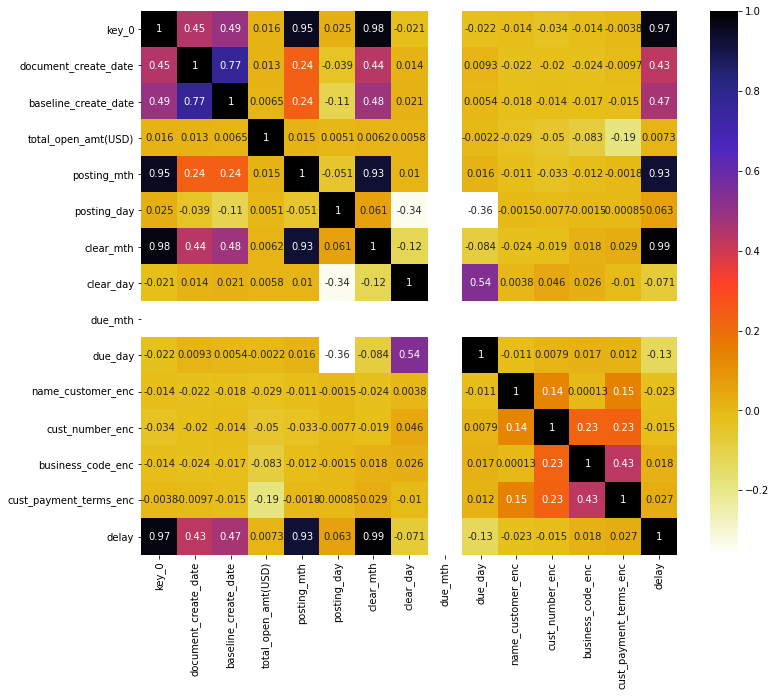

In [282]:
plt.figure(figsize=(12,10))
sns.heatmap(x_train.merge(y_train, on=x_train.index).corr(), annot=True, cmap= plt.cm.CMRmap_r)
plt.show()

In [283]:
#function to detect the features
def plotfeatures(df, feature):
  plt.figure(figsize=(16, 4))
  #histogram
  plt.subplot(1,3,1)
  df[feature].hist()
  #boxplot
  plt.subplot(1,3,2)
  plt.boxplot(df[feature])
  #Q-Q plot
  plt.subplot(1,3,3)
  stat.probplot(df[feature], dist='norm', plot=pylab)
  plt.show()

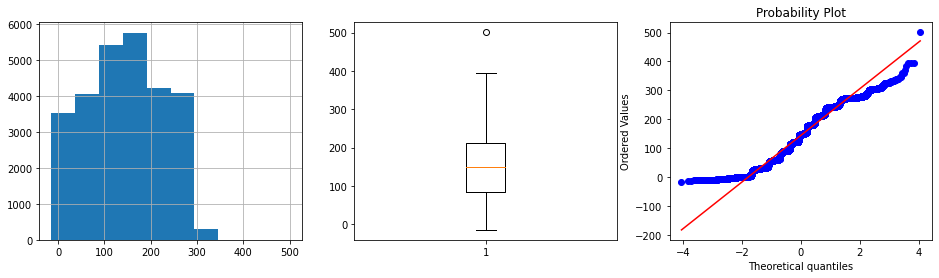

In [284]:
plotfeatures(y_train,'delay')

###Capping the outliers with upper and lower bound

In [285]:
#detect outliers using IQR
def detect_bounderies(df, col):
  q1=df[col].quantile(.25)
  q3=df[col].quantile(.75)
  IQR = q3-q1
  lower_bound= q1-1.5*IQR
  upper_bound= q3+1.5*IQR
  return lower_bound, upper_bound

In [286]:
def cap_outliers(df, col, lower_bound, upper_bound):
  df[col]= np.where(df[col]>upper_bound, upper_bound, 
                    np.where(df[col]<lower_bound, lower_bound, df[col]))
  

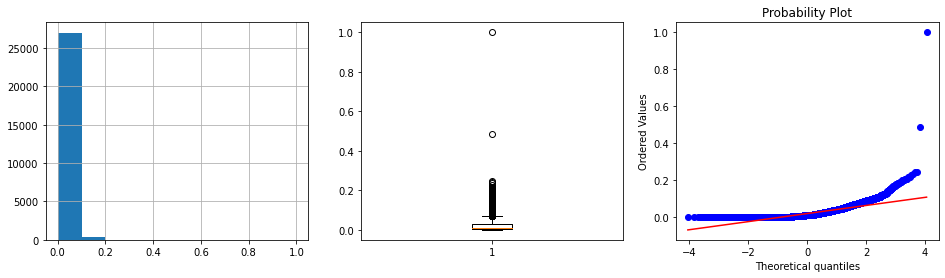

In [287]:
plotfeatures(x_train,'total_open_amt(USD)')

In [288]:
lower_amt, upper_amt = detect_bounderies(x_train, 'total_open_amt(USD)')
print(lower_amt, upper_amt)

-0.03737452597302293 0.07025713327969135


In [289]:
cap_outliers(x_train,'total_open_amt(USD)', lower_amt, upper_amt)

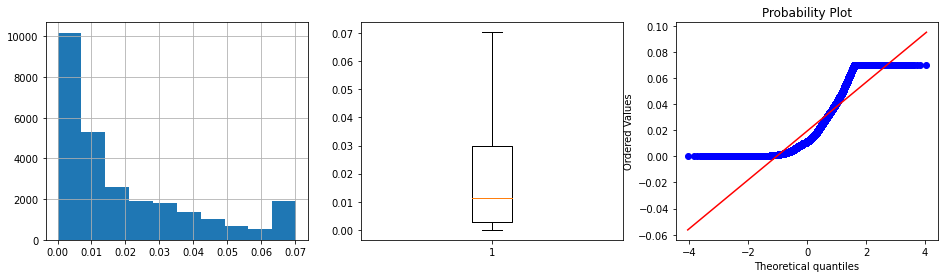

In [290]:
plotfeatures(x_train,'total_open_amt(USD)')

Dealing Outliers for Delay

In [291]:
#lower_d, upper_d = detect_bounderies(y_train, 'delay')
#cap_outliers(y_train,'delay', lower_d, upper_d)

In [292]:
#plotfeatures(y_train,'delay')

In [293]:
#y_train.delay = y_train.delay **(1/1.2)
#plotfeatures(y_train,'delay')

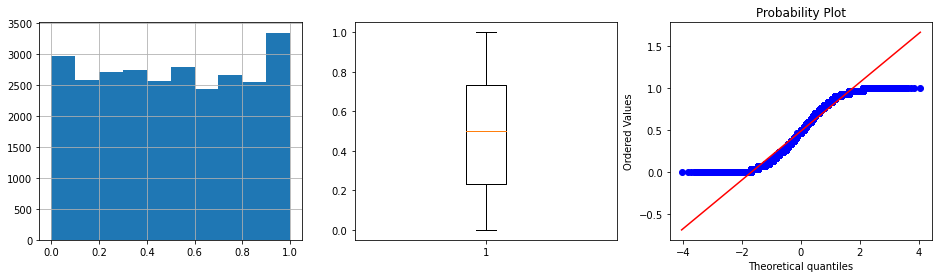

In [294]:
plotfeatures(x_train,'clear_day')

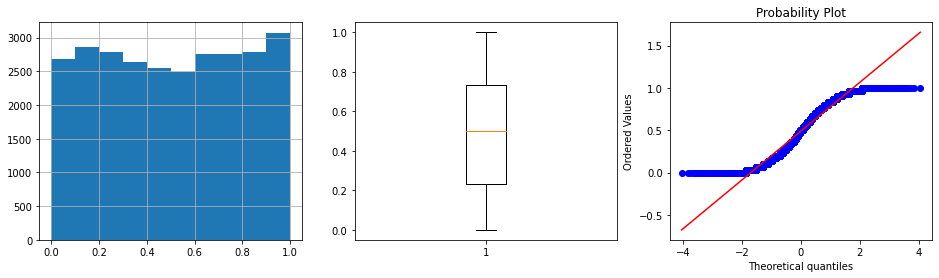

In [295]:
plotfeatures(x_train, 'posting_day')

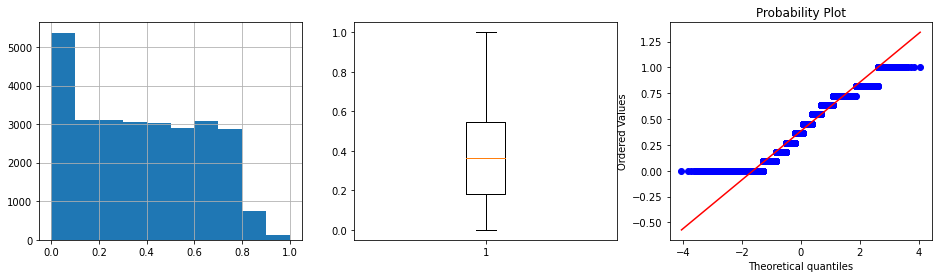

In [296]:
plotfeatures(x_train, 'posting_mth')

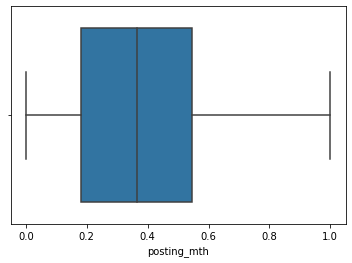

In [297]:
sns.boxplot(data=x_train.merge(y_train, on=x_train.index), x='posting_mth', hue='delay')

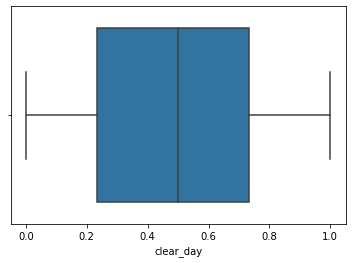

In [298]:
sns.boxplot(data=x_train.merge(y_train, on=x_train.index), x='clear_day', hue='delay')

Outliers for 'Doc_id'

In [299]:
#lower_did, upper_did = detect_bounderies(x_train, 'doc_id')
#cap_outliers(x_train,'doc_id',lower_did, upper_did)

In [300]:
#plotfeatures(x_train, 'doc_id')

In [301]:
#sns.boxplot(data=x_train.merge(y_train, on=x_train.index), x='doc_id', hue='delay')

Outliers for  'Doc create date'

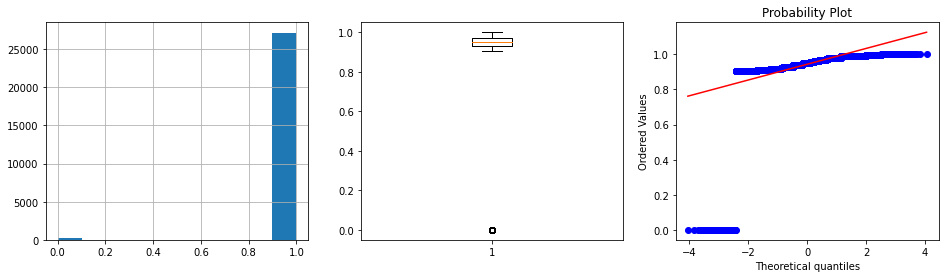

In [302]:
plotfeatures(x_train, 'document_create_date')

In [303]:
lower_dcd, upper_dcd = detect_bounderies(x_train, 'document_create_date')
cap_outliers(x_train,'document_create_date',lower_dcd, upper_dcd)

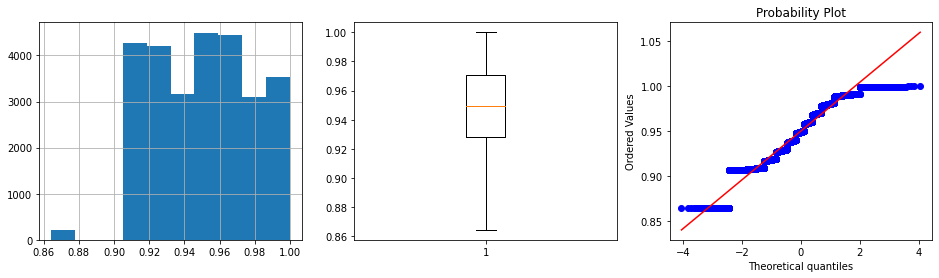

In [304]:
plotfeatures(x_train, 'document_create_date')

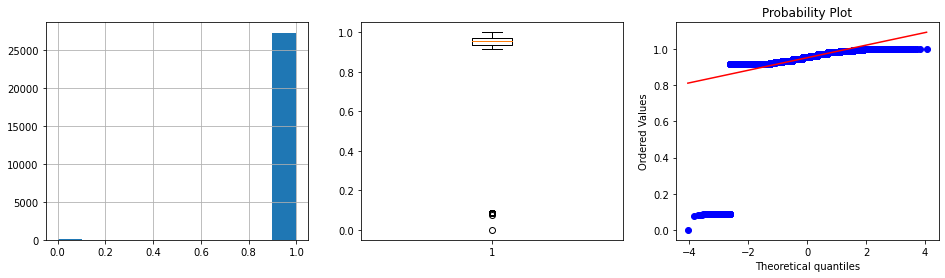

In [305]:
plotfeatures(x_train, 'baseline_create_date')

In [306]:
lower_bcd, upper_bcd = detect_bounderies(x_train, 'baseline_create_date')
cap_outliers(x_train,'baseline_create_date',lower_bcd, upper_bcd)

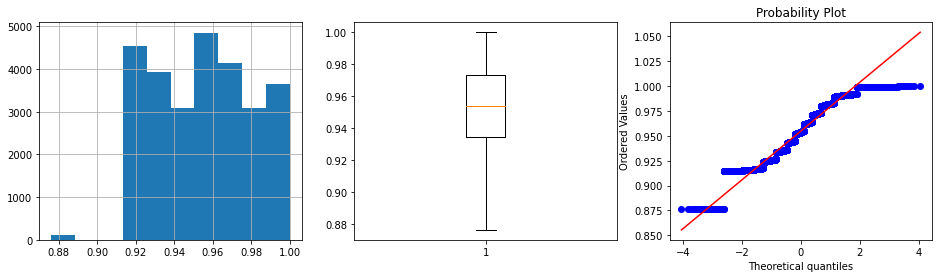

In [307]:
plotfeatures(x_train, 'baseline_create_date')

Outlier for Cust_number_enc

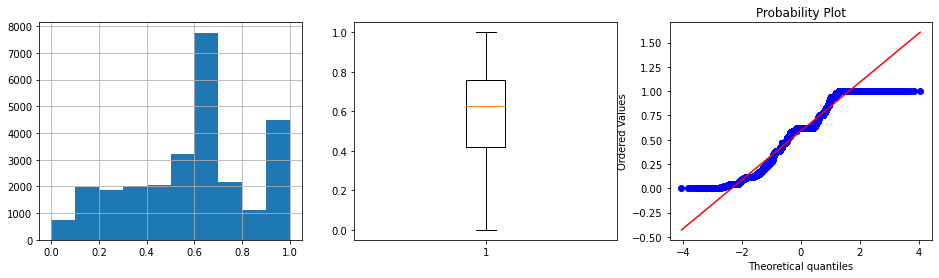

In [308]:
plotfeatures(x_train, 'cust_number_enc')

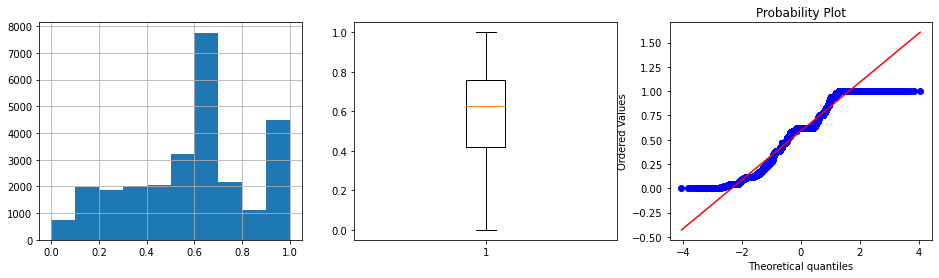

In [309]:
lower_cne, upper_cne= detect_bounderies(x_train, 'cust_number_enc')
cap_outliers(x_train,'cust_number_enc',lower_cne, upper_cne)
plotfeatures(x_train, 'cust_number_enc')

Outlier for name_customer-enc

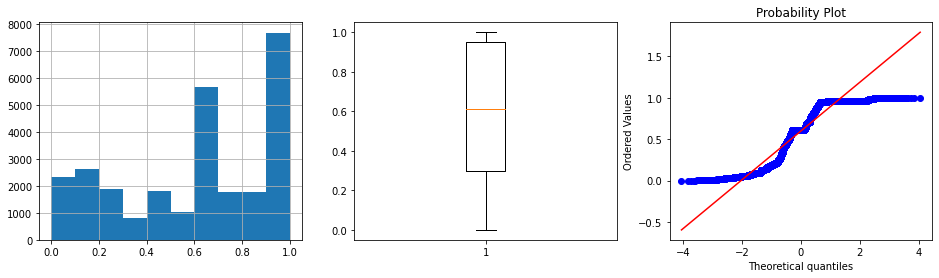

In [310]:
plotfeatures(x_train, 'name_customer_enc')

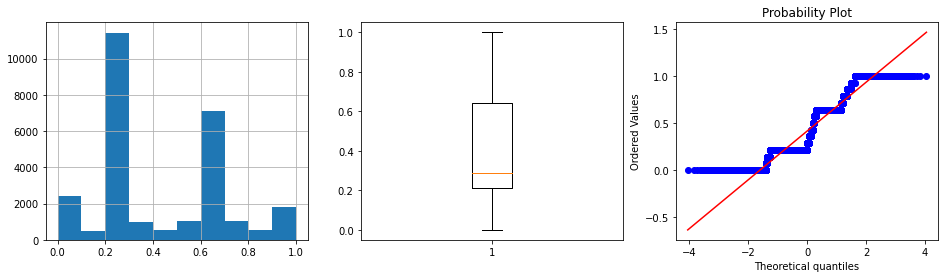

In [311]:
plotfeatures(x_train, 'cust_payment_terms_enc')

#Feature Selection

1. Drop const. col. -> variance Threshold
2. Corr()-> find corr feature and drop first, using function
3. Mutual Information--> to cal the more depending feature to determine 'target'

In [312]:
x_train.dtypes

document_create_date      float64
baseline_create_date      float64
total_open_amt(USD)       float64
posting_mth               float64
posting_day               float64
clear_mth                 float64
clear_day                 float64
due_mth                   float64
due_day                   float64
name_customer_enc         float64
cust_number_enc           float64
business_code_enc         float64
cust_payment_terms_enc    float64
dtype: object

###1. Drop Constants

In [313]:
#Drop the Constants
from sklearn.feature_selection import VarianceThreshold
var_t= VarianceThreshold(threshold=0)
var_t.fit(x_train)

var_t.get_support()

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True])

In [314]:
col_const = [col for col in x_train.columns
             if col not in x_train.columns[var_t.get_support()]]
print(col_const)

['due_mth']


In [315]:
x_train.drop(col_const, axis=1)

,document_create_date,baseline_create_date,total_open_amt(USD),posting_mth,posting_day,clear_mth,clear_day,due_day,name_customer_enc,cust_number_enc,business_code_enc,cust_payment_terms_enc
0,0.86,0.88,0.00,1.00,0.97,0.00,0.47,0.43,0.61,0.43,0.20,0.21
1,0.86,0.88,0.00,1.00,0.97,0.00,0.47,0.43,0.09,0.47,0.20,0.21
2,0.86,0.88,0.01,1.00,0.97,0.00,0.47,0.43,0.96,0.62,0.20,0.64
3,0.86,0.88,0.00,1.00,0.97,0.00,0.47,0.43,0.09,0.47,0.20,0.21
4,0.86,0.88,0.02,1.00,0.97,0.00,0.53,0.43,0.70,0.58,0.20,0.64
...,...,...,...,...,...,...,...,...,...,...,...,...
27369,1.00,1.00,0.01,0.82,0.23,0.82,0.97,0.90,0.61,1.00,0.20,0.43
27370,1.00,1.00,0.01,0.82,0.23,0.82,0.73,0.53,0.13,0.59,0.20,1.00
27371,1.00,1.00,0.07,0.82,0.23,0.82,0.73,0.73,0.48,0.55,0.20,0.21
27372,1.00,1.00,0.00,0.82,0.23,0.82,0.47,0.73,0.61,0.05,0.20,0.21


###2. Drop highly correlated values

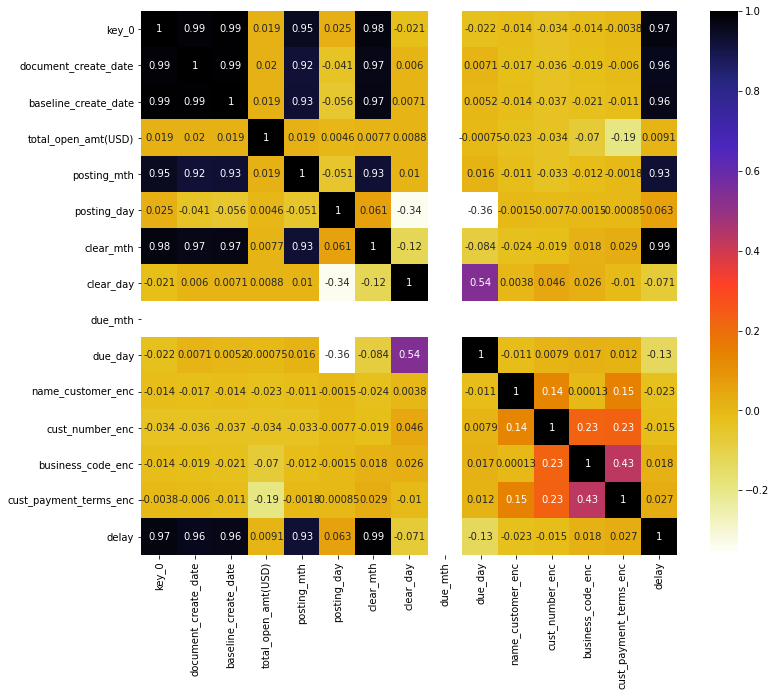

In [316]:
dataset=x_train.merge(y_train, on=x_train.index)
plt.figure(figsize=(12,10))
sns.heatmap(x_train.merge(y_train, on=x_train.index).corr(), annot=True, cmap= plt.cm.CMRmap_r)
plt.show()

In [317]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [318]:
corr_features = correlation(x_train, 0.8)
len(set(corr_features))

3

In [319]:
corr_features

{'baseline_create_date', 'clear_mth', 'posting_mth'}

###3. Information Gain--Mutual Information in 

In [320]:
from sklearn.feature_selection import mutual_info_regression

#determine the mutual info
mutual_info= mutual_info_regression(x_train.fillna(0), y_train)
mutual_info

array([2.04428854, 2.37391382, 0.07576932, 1.45692465, 0.43995723,
       2.08291777, 0.60164565, 0.0024842 , 0.57864174, 0.61343777,
       0.69302319, 0.05283702, 0.52853613])

In [321]:
#convert into df series and store and map values
mutual_info = pd.Series(mutual_info)
mutual_info.index = x_train.columns
mutual_info.sort_values(ascending=False)
#plot the mi val 

baseline_create_date     2.37
clear_mth                2.08
document_create_date     2.04
posting_mth              1.46
cust_number_enc          0.69
name_customer_enc        0.61
clear_day                0.60
due_day                  0.58
cust_payment_terms_enc   0.53
posting_day              0.44
total_open_amt(USD)      0.08
business_code_enc        0.05
due_mth                  0.00
dtype: float64

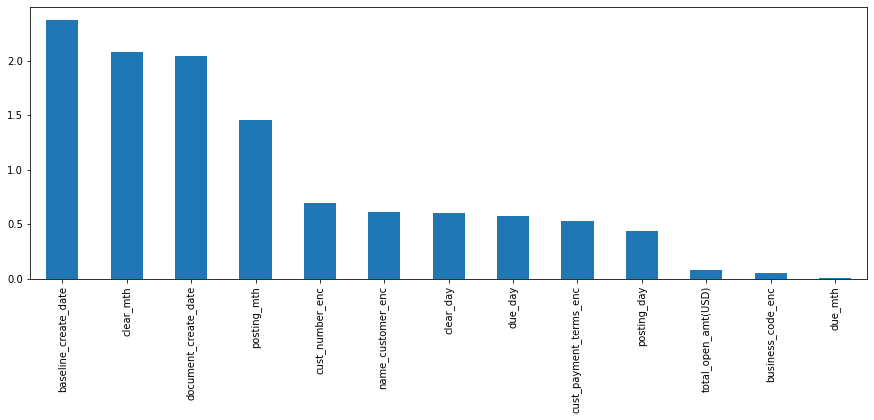

In [322]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [323]:
from sklearn.feature_selection import SelectKBest

#select the  top 8 important features
sel_8_cols = SelectKBest(mutual_info_regression, k=7)
sel_8_cols.fit(x_train, y_train)
x_train.columns[sel_8_cols.get_support()]

Index(['document_create_date', 'baseline_create_date', 'posting_mth',
       'clear_mth', 'clear_day', 'name_customer_enc', 'cust_number_enc'],
      dtype='object')

###4. Using Feature Importance

In [324]:
### Feature Importance
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
model.fit(x_train,y_train)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [325]:
print(model.feature_importances_)

[1.49754054e-01 2.07336938e-01 1.08577893e-04 1.89288006e-01
 1.64662341e-03 4.39686078e-01 3.95500334e-03 0.00000000e+00
 7.25583524e-03 1.30644851e-04 1.50516944e-04 9.76185764e-05
 5.90102865e-04]


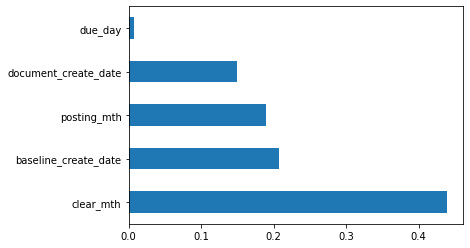

In [326]:
#plot the graph of the imp features
fea_imp= pd.Series(model.feature_importances_, index=x_train.columns )
fea_imp.nlargest(5).plot(kind='barh')
plt.show()

In [327]:
x_train.columns

Index(['document_create_date', 'baseline_create_date', 'total_open_amt(USD)',
       'posting_mth', 'posting_day', 'clear_mth', 'clear_day', 'due_mth',
       'due_day', 'name_customer_enc', 'cust_number_enc', 'business_code_enc',
       'cust_payment_terms_enc'],
      dtype='object')

In [328]:
#features selected for prediction to provide accurate results
x_train= x_train[['document_create_date', 'posting_mth', 'clear_mth', 'due_day','baseline_create_date']]
x_test=x_test[['document_create_date', 'posting_mth', 'clear_mth', 'due_day','baseline_create_date']]
x_val=x_val[['document_create_date', 'posting_mth', 'clear_mth', 'due_day','baseline_create_date']]
x_train

,document_create_date,posting_mth,clear_mth,due_day,baseline_create_date
0,0.86,1.00,0.00,0.43,0.88
1,0.86,1.00,0.00,0.43,0.88
2,0.86,1.00,0.00,0.43,0.88
3,0.86,1.00,0.00,0.43,0.88
4,0.86,1.00,0.00,0.43,0.88
...,...,...,...,...,...
27369,1.00,0.82,0.82,0.90,1.00
27370,1.00,0.82,0.82,0.53,1.00
27371,1.00,0.82,0.82,0.73,1.00
27372,1.00,0.82,0.82,0.73,1.00


#Model Training

##Logistic Regression, Decision Tree, SVM(Classification), Naive Bayes, KNN, LDA

In [121]:
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, accuracy_score,confusion_matrix, r2_score

In [122]:
#test options and evaluation matrix
seed= 6
scoring ='accuracy'

In [123]:
models=[]
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC())) #SVM(Classification)
#evaluate each model in turn
results =[]
names=[]
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results =model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg="%s: %f(%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.008000(0.008437)
LDA: 0.147764(0.048170)
KNN: 0.092207(0.029671)
CART: 0.091806(0.042681)
NB: 0.115332(0.056690)
SVM: 0.088514(0.029100)


Since from the above 6 models 
*   LDA(Linear Discriminant Analysis)--> 0.1477
*   NaiveBayes-->0.115 accuracy score

hence they can be considered for future prediction 

##RandomForest(Regression)

In [125]:
from sklearn.ensemble import RandomForestRegressor

In [126]:
#use random_grid to get the best hyperparameters
reg=RandomForestRegressor(n_estimators=100)
reg.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [127]:
reg.score(x_val, y_val)

0.6354865899387543

In [156]:
rf_y_pred_val=reg.predict(x_val)

**Accuracy Check**

In [157]:
import sklearn.metrics as metrics

print('MAE:', metrics.mean_absolute_error(y_val, rf_y_pred_val))
print('MSE:', metrics.mean_squared_error(y_val, rf_y_pred_val))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_val, rf_y_pred_val)))

MAE: 19.345900457440234
MSE: 3091.8943496439497
RMSE: 55.60480509491918


In [162]:
r2_score(y_val, rf_y_pred_val)

0.6354865899387543

###Using RandomizedSearchCV

Use RandomizedSearchCV to reduce number of iterations and with random combination of parameters. This is useful when we have too many parameters to try and your training time is longer. It helps reduce the cost of computation 

In [128]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 200, num = 4)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]


In [129]:
# Create the random grid
random_grid = {'n_estimators': [10,20,30,40,50,60,100,200],
             'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [10, 20, 30, 40, 50, 60, 100, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [134]:
from sklearn.model_selection import RandomizedSearchCV
rf=RandomForestRegressor()

In [135]:
# Random search of parameters, using 3 fold cross validation, search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,
                              scoring='neg_mean_squared_error', 
                              n_iter = 2, cv = 5, verbose=2, random_state=42, n_jobs = 1)


In [136]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20, total=   1.3s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20, total=   1.4s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20, total=   1.4s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20, total=   1.3s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20, total=   1.3s
[CV] n_estimators=40, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=25 
[CV]  n_estimators=40, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=25, total=   0.5s
[CV] n_estimators=40, min_samples_split=10, min_samp

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    9.2s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [137]:
rf_random.best_params_

{'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [138]:
rf_random.best_score_

-395.6153087467036

In [144]:
y_pred_val=rf_random.predict(x_val)

In [148]:
import sklearn.metrics as metrics

print('MAE:', metrics.mean_absolute_error(y_val, y_pred_val))
print('MSE:', metrics.mean_squared_error(y_val, y_pred_val))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_val, y_pred_val)))

MAE: 104.9951990175284
MSE: 13412.192206869597
RMSE: 115.81101936719837


In [149]:
r2_score(y_val, y_pred_val)

-0.5812066535474898

## XGBoost Regressor

In [151]:
import xgboost as xgb

In [154]:
# Fitting XGBoost Regressor to the Training Set
xgb_model = xgb.XGBRegressor()
xgb_model.fit(x_train, y_train)

[18:03:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [155]:
xgb_model.score(x_val, y_val)

0.3990450570777588

In [159]:
# Predicting the Test Set Results
xgb_pred = xgb_model.predict(x_val)

**Accuracy Check**

In [160]:
print('MAE:', metrics.mean_absolute_error(y_val, xgb_pred))
print('MSE:', metrics.mean_squared_error(y_val, xgb_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_val, xgb_pred)))

MAE: 52.70832742313212
MSE: 5097.450851258621
RMSE: 71.39643444359544


In [163]:
r2_score(y_val, xgb_pred)

0.39904505707775884

##Thus from the above model trainings it is concluded that "Random Forest"(without implementing RandomizedSearch CV) is the BEST Model for this dataset with the highest accuracy score of 63.5%  

In [165]:
#to confirm that model is not overfitting
y_pred_test=reg.predict(x_test)
mean_squared_error(y_test, y_pred_test, squared=False)

24.906859760522753

#Predict the Clear Dates of Test Dataset

##About Test Data

In [348]:
test = df[df['clear_date'].isnull()]

In [349]:
test.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,due_in_date,posting_id,baseline_create_date,cust_payment_terms,invoice_id,isOpen,total_open_amt(USD),delay
6124,U001,0200770677,Other,NaT,2020.00,2020-02-27,20200226,2020-01-13 00:03:00,1.00,20200227.00,NAA8,U001,1,45808.43,NaT
26759,U001,0200761734,H E BUT in,NaT,2020.00,2020-02-27,20200227,2020-01-13 00:03:00,1.00,20200227.00,NAA8,U001,1,94461.58,NaT
46835,U001,0200749225,Other,NaT,2020.00,2020-02-27,20200227,2020-01-13 00:03:00,1.00,20200227.00,NAA8,U001,1,6245.50,NaT
44597,U001,0200466603,SMITH'S us,NaT,2020.00,2020-02-27,20200226,2020-01-13 00:03:00,1.00,20200227.00,NAA8,U001,1,16592.17,NaT
47979,U001,CCCA02,KRAFT,NaT,2020.00,2020-02-27,20200227,2020-01-02 00:04:00,1.00,20200227.00,NAG2,U001,1,25396.25,NaT


##Preprocessing Test Dataset

In [350]:
test.isnull().sum()

business_code              0
cust_number                0
name_customer              0
clear_date              9674
buisness_year              0
posting_date               0
document_create_date       0
due_in_date                0
posting_id                 0
baseline_create_date       0
cust_payment_terms         0
invoice_id                 0
isOpen                     0
total_open_amt(USD)        0
delay                   9674
dtype: int64

In [352]:
xtest=test.drop(columns=['delay'], axis=1)
test.drop(columns=['delay'], inplace=True, axis=1)

##Feature Engineering

In [357]:
xtest.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'posting_date', 'document_create_date', 'due_in_date',
       'posting_id', 'baseline_create_date', 'cust_payment_terms',
       'invoice_id', 'isOpen', 'total_open_amt(USD)'],
      dtype='object')

In [345]:
xtest.nunique()

business_code              5
cust_number              277
name_customer            783
clear_date                 0
buisness_year              1
posting_date              81
document_create_date      87
due_in_date              130
posting_id                 1
baseline_create_date      84
cust_payment_terms        15
invoice_id                 5
isOpen                     1
total_open_amt(USD)     8993
dtype: int64

In [358]:
# fn to drop col with 1/2 unique col(here, they dont hold much value otherwise do label encoding, or bucketize 'em)
def drop_trash(df):
  for col in df.columns:
    if df[col].nunique()<=2:
        df.drop( col, axis=1, inplace=True)

#drop_trash(xtest)

In [347]:
xtest.columns

Index(['business_code', 'cust_number', 'name_customer', 'posting_date',
       'document_create_date', 'due_in_date', 'baseline_create_date',
       'cust_payment_terms', 'invoice_id', 'total_open_amt(USD)'],
      dtype='object')

In [335]:
xtest.dtypes

document_create_date        int64
baseline_create_date      float64
total_open_amt(USD)       float64
posting_mth                 int64
posting_day                 int64
due_day                     int64
name_customer_enc           int16
cust_number_enc             int16
business_code_enc            int8
cust_payment_terms_enc       int8
dtype: object

In [359]:
#function to convert posting date to month
def converposting_date(df, fea):
  df[fea]=pd.to_datetime(df[fea])
  df['posting_mth']=df[fea].dt.month
  df['posting_day']=df[fea].dt.day

converposting_date(xtest, 'posting_date')

In [360]:
xtest.posting_mth.head()

6124     2
26759    2
46835    2
44597    2
47979    2
Name: posting_mth, dtype: int64

In [361]:
#function to convert due date to month
def converposting_date(df, fea):
  df[fea]=pd.to_datetime(df[fea])
  df['due_mth']=df[fea].dt.month
  df['due_day']=df[fea].dt.day

converposting_date(xtest, 'due_in_date')

In [378]:
def converposting_date(df, fea):
  df[fea]=pd.to_datetime(df[fea])
  df['clear_mth']=df['clear_date'].fillna(0)
  df['clear_day']=df['clear_date'].fillna(0)

converposting_date(xtest, 'clear_date')

In [381]:
xtest.dtypes

document_create_date        int64
baseline_create_date      float64
total_open_amt(USD)       float64
posting_mth                 int64
posting_day                 int64
due_mth                     int64
due_day                     int64
name_customer_enc           int16
cust_number_enc             int16
business_code_enc            int8
cust_payment_terms_enc       int8
clear_mth                   int64
clear_day                   int64
dtype: object

In [ ]:
xtest['posting_date'].dt.year.value_counts()

In [364]:
#store the dates for later use if needed
post_due_dates=xtest.drop(columns=['posting_date', 'due_in_date','clear_date'], axis=1, inplace=True)

In [368]:
#Ordinal Encoding by using .cat.codes
#from sklearn.preprocessing import OrdinalEncoder
#encoder = OrdinalEncoder(handle_unknown= 'use_encoded_value', unknown_value='-1)
#x_train[['name_cust_enc','cust_no_enc', 'business_code_enc','cust_payment_terms_enc']] = encoder.fit_transform(x_train[['name_customer', 'cust_number', 'business_code','cust_payment_terms']])

xtest['name_customer_enc'] = xtest['name_customer'].astype('category').cat.codes
xtest['cust_number_enc'] = xtest['cust_number'].astype('category').cat.codes
xtest['business_code_enc'] = xtest['business_code'].astype('category').cat.codes
xtest['cust_payment_terms_enc'] = xtest['cust_payment_terms'].astype('category').cat.codes

xtest[['name_customer', 'cust_number', 'business_code','cust_payment_terms','name_customer_enc','cust_number_enc', 'business_code_enc','cust_payment_terms_enc']]

,name_customer,cust_number,business_code,cust_payment_terms,name_customer_enc,cust_number_enc,business_code_enc,cust_payment_terms_enc
6124,Other,0200770677,U001,NAA8,480,175,1,3
26759,H E BUT in,0200761734,U001,NAA8,268,161,1,3
46835,Other,0200749225,U001,NAA8,480,149,1,3
44597,SMITH'S us,0200466603,U001,NAA8,593,82,1,3
47979,KRAFT,CCCA02,U001,NAG2,323,272,1,7
...,...,...,...,...,...,...,...,...
38299,COSTCO co,0140104429,CA02,CA10,139,32,0,0
10215,Other,Other,U001,NAA8,480,276,1,3
14402,Other,Other,U001,NAA8,480,276,1,3
8545,Other,Other,U013,Other,480,276,4,14


In [369]:
xtest.drop(columns=['name_customer', 'cust_number', 'business_code','cust_payment_terms'], axis=1, inplace=True)

In [370]:
xtest.dtypes

clear_date                float64
buisness_year             float64
document_create_date        int64
posting_id                float64
baseline_create_date      float64
invoice_id                 object
isOpen                      int64
total_open_amt(USD)       float64
posting_mth                 int64
posting_day                 int64
due_mth                     int64
due_day                     int64
name_customer_enc           int16
cust_number_enc             int16
business_code_enc            int8
cust_payment_terms_enc       int8
dtype: object

In [373]:
xtest.drop(columns=['isOpen','invoice_id','buisness_year','posting_id'], inplace=True, axis=1)

In [374]:
xtest.dtypes

clear_date                float64
document_create_date        int64
baseline_create_date      float64
total_open_amt(USD)       float64
posting_mth                 int64
posting_day                 int64
due_mth                     int64
due_day                     int64
name_customer_enc           int16
cust_number_enc             int16
business_code_enc            int8
cust_payment_terms_enc       int8
dtype: object

In [375]:
xtest.columns

Index(['clear_date', 'document_create_date', 'baseline_create_date',
       'total_open_amt(USD)', 'posting_mth', 'posting_day', 'due_mth',
       'due_day', 'name_customer_enc', 'cust_number_enc', 'business_code_enc',
       'cust_payment_terms_enc'],
      dtype='object')

##Feature Scaling

In [382]:
xtests=pd.DataFrame(minmax.transform(xtest), columns=xtest.columns)
xtests.head()

,document_create_date,baseline_create_date,total_open_amt(USD),posting_mth,posting_day,due_mth,due_day,name_customer_enc,cust_number_enc,business_code_enc,cust_payment_terms_enc,clear_mth,clear_day
0,1.94,1.86,0.03,0.09,0.87,0.00,0.40,479.00,5.80,0.00,0.01,0.00,0.00
1,1.94,1.86,0.06,0.09,0.87,0.00,0.40,267.00,5.33,0.00,0.01,0.00,0.00
2,1.94,1.86,0.00,0.09,0.87,0.00,0.40,479.00,4.93,0.00,0.01,0.00,0.00
3,1.94,1.86,0.01,0.09,0.87,0.00,0.40,592.00,2.70,0.00,0.01,0.00,0.00
4,1.94,1.86,0.02,0.09,0.87,0.00,0.03,322.00,9.03,0.00,0.02,0.00,0.00


In [383]:
x_train.columns

Index(['document_create_date', 'posting_mth', 'clear_mth', 'due_day',
       'baseline_create_date'],
      dtype='object')

In [384]:
xtest= xtest[['document_create_date', 'posting_mth', 'clear_mth', 'due_day','baseline_create_date']]

In [385]:
xtest.columns

Index(['document_create_date', 'posting_mth', 'clear_mth', 'due_day',
       'baseline_create_date'],
      dtype='object')

##Predict The Delay and Clear Date

In [386]:
final_output= reg.predict(xtest)

In [387]:
final_output = pd.Series(final_output, name='Delay')

In [388]:
test.reset_index(drop=True, inplace=True)

In [389]:
final=test.merge(final_output, on=test.index)
final

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,due_in_date,posting_id,baseline_create_date,cust_payment_terms,invoice_id,isOpen,total_open_amt(USD),Delay
0,0,U001,0200770677,Other,NaT,2020.00,2020-02-27,20200226,2020-01-13 00:03:00,1.00,20200227.00,NAA8,U001,1,45808.43,6.06
1,1,U001,0200761734,H E BUT in,NaT,2020.00,2020-02-27,20200227,2020-01-13 00:03:00,1.00,20200227.00,NAA8,U001,1,94461.58,6.06
2,2,U001,0200749225,Other,NaT,2020.00,2020-02-27,20200227,2020-01-13 00:03:00,1.00,20200227.00,NAA8,U001,1,6245.50,6.06
3,3,U001,0200466603,SMITH'S us,NaT,2020.00,2020-02-27,20200226,2020-01-13 00:03:00,1.00,20200227.00,NAA8,U001,1,16592.17,6.06
4,4,U001,CCCA02,KRAFT,NaT,2020.00,2020-02-27,20200227,2020-01-02 00:04:00,1.00,20200227.00,NAG2,U001,1,25396.25,6.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9669,9669,CA02,0140104429,COSTCO co,NaT,2020.00,2020-05-13,20200513,2020-01-23 00:05:00,1.00,20200513.00,CA10,CA02,1,34064.49,6.06
9670,9670,U001,Other,Other,NaT,2020.00,2020-05-15,20200514,2020-01-30 00:05:00,1.00,20200515.00,NAA8,U001,1,15902.25,6.06
9671,9671,U001,Other,Other,NaT,2020.00,2020-05-16,20200513,2020-01-31 00:05:00,1.00,20200516.00,NAA8,U001,1,17893.25,6.06
9672,9672,U013,Other,Other,NaT,2020.00,2020-05-20,20200520,2020-01-19 00:06:00,1.00,20200520.00,Other,U013,1,60726.46,6.06


In [391]:
final.Delay.dtypes

dtype('float64')

In [397]:
final['clear_date']=final['due_in_date']+ pd.to_timedelta(final['Delay'], unit='d')
final['clear_date']=pd.to_datetime(final.clear_date).dt.date

In [398]:
final

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,due_in_date,posting_id,baseline_create_date,cust_payment_terms,invoice_id,isOpen,total_open_amt(USD),Delay
0,0,U001,0200770677,Other,2020-01-19,2020.00,2020-02-27,20200226,2020-01-13 00:03:00,1.00,20200227.00,NAA8,U001,1,45808.43,6.06
1,1,U001,0200761734,H E BUT in,2020-01-19,2020.00,2020-02-27,20200227,2020-01-13 00:03:00,1.00,20200227.00,NAA8,U001,1,94461.58,6.06
2,2,U001,0200749225,Other,2020-01-19,2020.00,2020-02-27,20200227,2020-01-13 00:03:00,1.00,20200227.00,NAA8,U001,1,6245.50,6.06
3,3,U001,0200466603,SMITH'S us,2020-01-19,2020.00,2020-02-27,20200226,2020-01-13 00:03:00,1.00,20200227.00,NAA8,U001,1,16592.17,6.06
4,4,U001,CCCA02,KRAFT,2020-01-08,2020.00,2020-02-27,20200227,2020-01-02 00:04:00,1.00,20200227.00,NAG2,U001,1,25396.25,6.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9669,9669,CA02,0140104429,COSTCO co,2020-01-29,2020.00,2020-05-13,20200513,2020-01-23 00:05:00,1.00,20200513.00,CA10,CA02,1,34064.49,6.06
9670,9670,U001,Other,Other,2020-02-05,2020.00,2020-05-15,20200514,2020-01-30 00:05:00,1.00,20200515.00,NAA8,U001,1,15902.25,6.06
9671,9671,U001,Other,Other,2020-02-06,2020.00,2020-05-16,20200513,2020-01-31 00:05:00,1.00,20200516.00,NAA8,U001,1,17893.25,6.06
9672,9672,U013,Other,Other,2020-01-25,2020.00,2020-05-20,20200520,2020-01-19 00:06:00,1.00,20200520.00,Other,U013,1,60726.46,6.06


In [404]:
#to bucketize the delay columns
bins = np.array([0,15,16,30,31,45])
final["bucket"] = pd.cut(final.Delay, bins)
final

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,due_in_date,posting_id,baseline_create_date,cust_payment_terms,invoice_id,isOpen,total_open_amt(USD),Delay,bucket
0,0,U001,0200770677,Other,2020-01-19,2020.00,2020-02-27,20200226,2020-01-13 00:03:00,1.00,20200227.00,NAA8,U001,1,45808.43,6.06,"(0, 15]"
1,1,U001,0200761734,H E BUT in,2020-01-19,2020.00,2020-02-27,20200227,2020-01-13 00:03:00,1.00,20200227.00,NAA8,U001,1,94461.58,6.06,"(0, 15]"
2,2,U001,0200749225,Other,2020-01-19,2020.00,2020-02-27,20200227,2020-01-13 00:03:00,1.00,20200227.00,NAA8,U001,1,6245.50,6.06,"(0, 15]"
3,3,U001,0200466603,SMITH'S us,2020-01-19,2020.00,2020-02-27,20200226,2020-01-13 00:03:00,1.00,20200227.00,NAA8,U001,1,16592.17,6.06,"(0, 15]"
4,4,U001,CCCA02,KRAFT,2020-01-08,2020.00,2020-02-27,20200227,2020-01-02 00:04:00,1.00,20200227.00,NAG2,U001,1,25396.25,6.06,"(0, 15]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9669,9669,CA02,0140104429,COSTCO co,2020-01-29,2020.00,2020-05-13,20200513,2020-01-23 00:05:00,1.00,20200513.00,CA10,CA02,1,34064.49,6.06,"(0, 15]"
9670,9670,U001,Other,Other,2020-02-05,2020.00,2020-05-15,20200514,2020-01-30 00:05:00,1.00,20200515.00,NAA8,U001,1,15902.25,6.06,"(0, 15]"
9671,9671,U001,Other,Other,2020-02-06,2020.00,2020-05-16,20200513,2020-01-31 00:05:00,1.00,20200516.00,NAA8,U001,1,17893.25,6.06,"(0, 15]"
9672,9672,U013,Other,Other,2020-01-25,2020.00,2020-05-20,20200520,2020-01-19 00:06:00,1.00,20200520.00,Other,U013,1,60726.46,6.06,"(0, 15]"


##Save the Model

In [414]:
import pickle
# open a file,  to store the data
filename = '/content/drive/MyDrive/Colab Notebooks/HIghRadius/RF--model.sav'
# dump information to that file
pickle.dump(reg, open(filename, 'wb'))

#save final output in csv form
final.index = test.index
final.to_csv('/content/drive/MyDrive/Colab Notebooks/HIghRadius/FinalPredictedDate.csv')

In [407]:
#to reload the model
#loaded_model = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/HIghRadius/RFmodel.sav', 'rb'))
#result = loaded_model.score(x_test, y_test)
#print(result)

#Task Complete--'Clear Date' is predicted using Random Forest with 63% accuracy 